<a href="https://colab.research.google.com/github/Omkaarr1/Medical_Image_Classification_Using_CNN/blob/main/Brain_Tumor_Detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'keras-pretrained-models:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2798%2F7251%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240919%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240919T055030Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5982de94936ae0a808d8cbd629f675b8d08e4592b07f352d6c8e0da808efd483ac3b8d45987bd63584401b73f40556bbdba1849b7cd7215b85bae7aa6219a463faf6d95e504aec210f8c373f62f0e85272f1807ceda9345ee22da2b9b193f9fee40dd1332c632e0093cd1c579cb0b6e7ace1a9cf14349a39555b6a9c4d26ea6ae064a4726d1f9908c65a2dc088ddc6b29deaef05b56ad09b94d3c3a9088c4178a42ce10edb3a8ff97481d200fac2de2950ffae1198bda5d84943cbb0f9f433acf6a7d842bfaf4687accd3d31bd51c4490fa6baf3aa178d8fd948a9e2f00015e562f18331ab4563034e7463930088370963bfb89068dcff90556f0bce93f4d3ab,brain-mri-images-for-brain-tumor-detection:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F165566%2F377107%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240919%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240919T055030Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D23cf00cb5f6b274e2296b2334ac2c335e61629528d730406e83c98b5070f909f1b751a939aaaf2d253299254057efc6f25a2b9f85a397a6cad476d023abf54e02fa5bb5c5c34729445147bcc88bdd6ed6be95c10fb5c8ebf31d77719d28edc7f31160b41a17a3c81ebac66796b75e5b05e150ee594286bee2b2dc257834670f377a0a18ca50fe62238ba49224ea1349c5a2c660b1593dc87d26faa75037ccd5298fcdde3a5b67659c7caf5444cd011e4ca449e7f3c511ed1723fbf033d31834e5b46b4a08c75b313ddbad3f867be6a5aa1d3c030105aca8bcfa07ebf188395abb72effbf2ff9093ed44c6ee8da31049438c2affcfe1bdf7abbb24113edf6147f'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 989248706 bytes downloaded
Downloaded and uncompressed: keras-pretrained-models
[==================================================] 15828590 bytes downloaded
Downloaded and uncompressed: brain-mri-images-for-brain-tumor-detection
Data source import complete.


In [ ]:
from IPython.display import clear_output
!pip install imutils
clear_output()

In [ ]:
!apt-get install tree
clear_output()
# create new folders
!mkdir TRAIN TEST VAL TRAIN/YES TRAIN/NO TEST/YES TEST/NO VAL/YES VAL/NO
!tree -d

.
├── sample_data
├── TEST
│   ├── NO
│   └── YES
├── TRAIN
│   ├── NO
│   └── YES
└── VAL
    ├── NO
    └── YES

10 directories


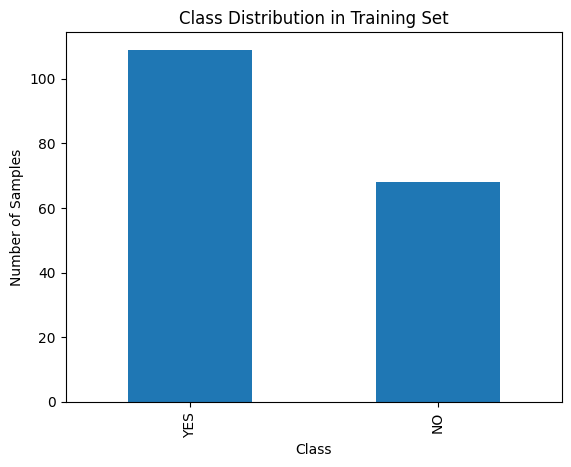

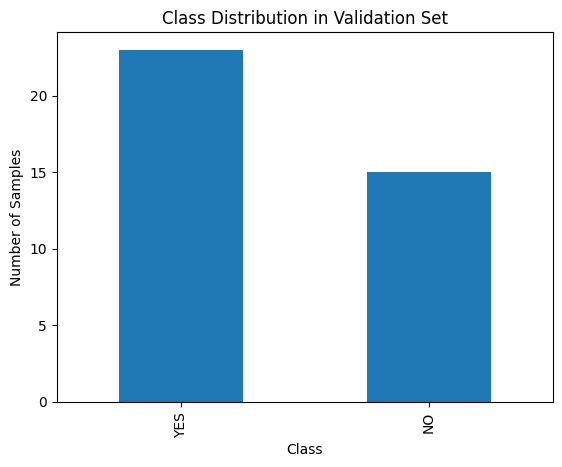

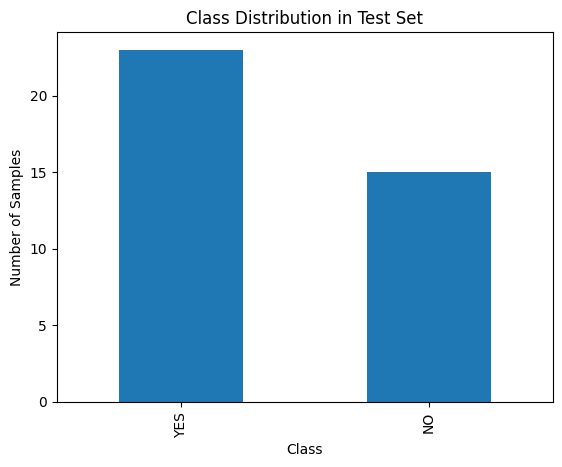

177 images loaded from TRAIN/ directory.
38 images loaded from VAL/ directory.
38 images loaded from TEST/ directory.


In [ ]:
# Brain Tumor Detection with CNN and VGG-16
# Updated Code with Corrections, Stratified Splitting, and Fine-tuning

# Import necessary libraries
import os
import shutil
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import cv2
import itertools
import imutils
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Initialize Plotly
init_notebook_mode(connected=True)

# Set random seed for reproducibility
RANDOM_SEED = 123

# Define image size and paths
IMG_SIZE = (224, 224)
TRAIN_DIR = 'TRAIN/'
VAL_DIR = 'VAL/'
TEST_DIR = 'TEST/'
TRAIN_CROP_DIR = 'TRAIN_CROP/'
VAL_CROP_DIR = 'VAL_CROP/'
TEST_CROP_DIR = 'TEST_CROP/'

# Remove existing directories if they exist
for dir_path in [TRAIN_DIR, VAL_DIR, TEST_DIR, TRAIN_CROP_DIR, VAL_CROP_DIR, TEST_CROP_DIR]:
    shutil.rmtree(dir_path, ignore_errors=True)

# Create new directories for train, validation, and test sets
for dir_path in [TRAIN_DIR, VAL_DIR, TEST_DIR]:
    os.makedirs(os.path.join(dir_path, 'YES'), exist_ok=True)
    os.makedirs(os.path.join(dir_path, 'NO'), exist_ok=True)

# Path to the dataset (adjust this path to your dataset location)

IMG_PATH = '../input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/'

# Collect all image paths and labels
image_paths = []
labels_list = []
for CLASS in os.listdir(IMG_PATH):
    if not CLASS.startswith('.'):
        class_dir = os.path.join(IMG_PATH, CLASS)
        for FILE_NAME in os.listdir(class_dir):
            if not FILE_NAME.startswith('.'):
                img_path = os.path.join(class_dir, FILE_NAME)
                image_paths.append(img_path)
                labels_list.append(CLASS.upper())

# Combine image paths and labels
data = list(zip(image_paths, labels_list))

# Convert labels to numerical format
label_to_index = {'NO': 0, 'YES': 1}
labels_numeric = [label_to_index[label] for label in labels_list]

# Split data into train+val and test sets first (85% train+val, 15% test)
train_val_data, test_data, train_val_labels, test_labels = train_test_split(
    data, labels_numeric, test_size=0.15, random_state=RANDOM_SEED, stratify=labels_numeric)

# Split train+val into train and val sets (70% train, 15% val)
train_data, val_data, train_labels, val_labels = train_test_split(
    train_val_data, train_val_labels, test_size=0.1765, random_state=RANDOM_SEED, stratify=train_val_labels)
    # 0.1765 * 85% ≈ 15% of total data

# Function to copy images to respective directories
def copy_images(data_list, destination_dir):
    for img_path, label in data_list:
        dest_dir = os.path.join(destination_dir, label)
        os.makedirs(dest_dir, exist_ok=True)
        shutil.copy(img_path, dest_dir)

# Copy images to train, val, and test directories
copy_images(train_data, TRAIN_DIR)
copy_images(val_data, VAL_DIR)
copy_images(test_data, TEST_DIR)

# Function to plot class distribution
def plot_class_distribution(data_list, set_name):
    df = pd.DataFrame(data_list, columns=['ImagePath', 'Label'])
    class_counts = df['Label'].value_counts()
    class_counts.plot(kind='bar', title=f'Class Distribution in {set_name} Set')
    plt.xlabel('Class')
    plt.ylabel('Number of Samples')
    plt.show()

# Plot class distributions
plot_class_distribution(train_data, 'Training')
plot_class_distribution(val_data, 'Validation')
plot_class_distribution(test_data, 'Test')

# Function to load data
def load_data(dir_path, img_size=(100, 100)):
    X = []
    y = []
    labels = {}
    for i, path in enumerate(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            class_dir = os.path.join(dir_path, path)
            for file in os.listdir(class_dir):
                if not file.startswith('.'):
                    img = cv2.imread(os.path.join(class_dir, file))
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
                    img = cv2.resize(img, img_size)
                    X.append(img)
                    y.append(i)
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels

# Load data
X_train, y_train, labels = load_data(TRAIN_DIR, IMG_SIZE)
X_val, y_val, _ = load_data(VAL_DIR, IMG_SIZE)
X_test, y_test, _ = load_data(TEST_DIR, IMG_SIZE)

# Function to crop images
def crop_imgs(set_name, add_pixels_value=0):
    set_new = []
    for img in set_name:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)

        # Threshold the image, then perform a series of erosions and dilations
        thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        # Find contours in thresholded image
        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)

        # Proceed if at least one contour was found
        if len(cnts) > 0:
            c = max(cnts, key=cv2.contourArea)

            # Find the extreme points
            extLeft = tuple(c[c[:, :, 0].argmin()][0])
            extRight = tuple(c[c[:, :, 0].argmax()][0])
            extTop = tuple(c[c[:, :, 1].argmin()][0])
            extBot = tuple(c[c[:, :, 1].argmax()][0])

            ADD_PIXELS = add_pixels_value
            new_img = img[max(extTop[1]-ADD_PIXELS, 0):min(extBot[1]+ADD_PIXELS, img.shape[0]),
                          max(extLeft[0]-ADD_PIXELS, 0):min(extRight[0]+ADD_PIXELS, img.shape[1])].copy()

            # Resize image if cropping results in zero height or width
            if new_img.shape[0] == 0 or new_img.shape[1] == 0:
                new_img = cv2.resize(img, (IMG_SIZE[1], IMG_SIZE[0]))

            set_new.append(new_img)
        else:
            # If no contours were found, append the original image
            set_new.append(img)

    # Resize all images to a consistent size
    set_new = [cv2.resize(img, (IMG_SIZE[1], IMG_SIZE[0])) for img in set_new]
    return np.array(set_new)

# Apply cropping to images
X_train_crop = crop_imgs(X_train)
X_val_crop = crop_imgs(X_val)
X_test_crop = crop_imgs(X_test)

# Create directories for cropped images
for dir_path in [TRAIN_CROP_DIR, VAL_CROP_DIR, TEST_CROP_DIR]:
    os.makedirs(os.path.join(dir_path, 'YES'), exist_ok=True)
    os.makedirs(os.path.join(dir_path, 'NO'), exist_ok=True)


In [ ]:
def save_images(images, labels, folder_name):
    for i, (img, label) in enumerate(zip(images, labels)):
        # Convert numerical label to class name
        class_name = 'YES' if label == 1 else 'NO'
        filename = os.path.join(folder_name, class_name, f'{i}.jpg')
        img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Convert back to BGR for saving
        cv2.imwrite(filename, img_bgr)

# Save cropped images
save_images(X_train_crop, y_train, TRAIN_CROP_DIR)
save_images(X_val_crop, y_val, VAL_CROP_DIR)
save_images(X_test_crop, y_test, TEST_CROP_DIR)

# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=preprocess_input
)

# Data generator for validation and test sets
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    TRAIN_CROP_DIR,
    target_size=IMG_SIZE,
    color_mode='rgb',
    batch_size=32,
    class_mode='binary',
    seed=RANDOM_SEED
)

validation_generator = test_datagen.flow_from_directory(
    VAL_CROP_DIR,
    target_size=IMG_SIZE,
    color_mode='rgb',
    batch_size=16,
    class_mode='binary',
    seed=RANDOM_SEED,
    shuffle=False  # Important to ensure consistent labels
)

test_generator = test_datagen.flow_from_directory(
    TEST_CROP_DIR,
    target_size=IMG_SIZE,
    color_mode='rgb',
    batch_size=16,
    class_mode='binary',
    seed=RANDOM_SEED,
    shuffle=False
)

# Load base model VGG16
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=IMG_SIZE + (3,)
)

# Build the model
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dropout(0.7))  # Increased dropout rate to prevent overfitting
model.add(layers.Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))  # Added L2 regularization

# Freeze all layers except the top ones for fine-tuning
for layer in base_model.layers[:-4]:
    layer.trainable = False

# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=1e-5),
    metrics=['accuracy']
)

# Display model architecture
model.summary()

# Training parameters
EPOCHS = 50
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=8,
    verbose=1,
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping]
)


Found 177 images belonging to 2 classes.
Found 38 images belonging to 2 classes.
Found 38 images belonging to 2 classes.
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_6 (Dropout)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 1)                 25089     
                                                                 
Total params: 14739777 (56.23 MB)
Trainable params: 7104513 (27.10 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________
Epoch 1/50
5/5 [===

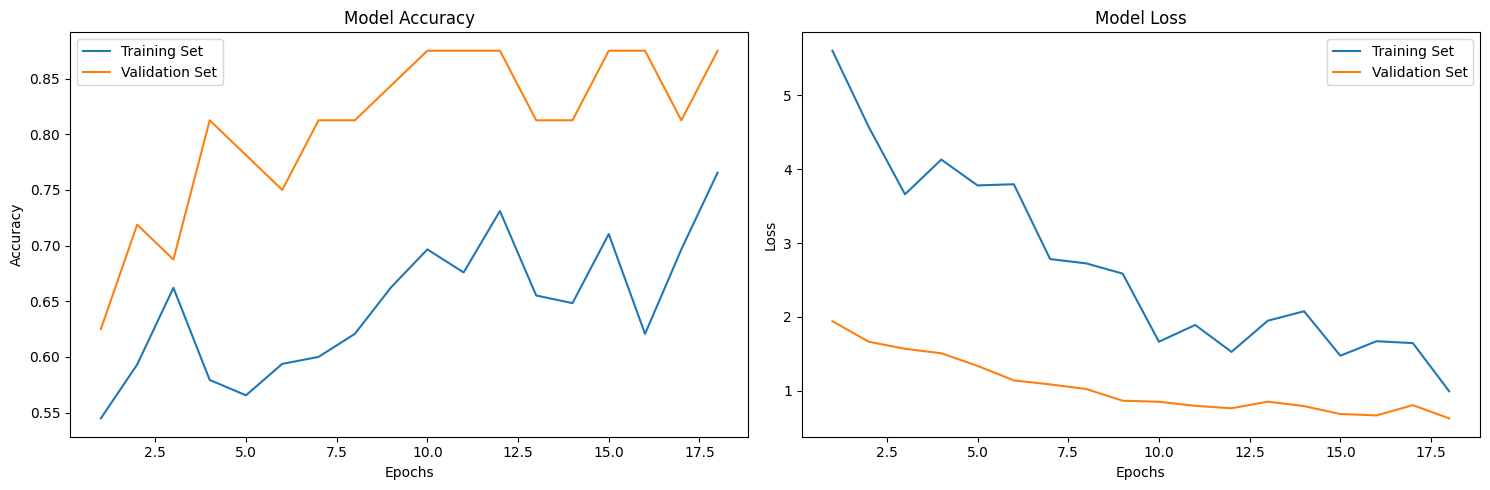

3/3 [==============================] - 1s 224ms/step
Validation Accuracy = 89.47%


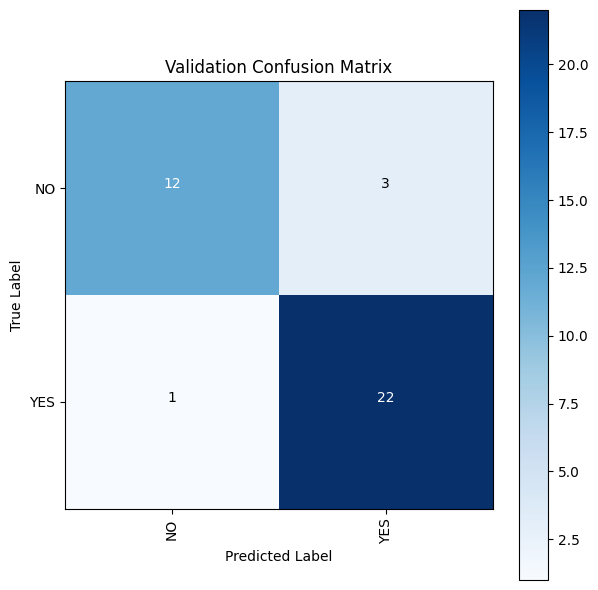

3/3 [==============================] - 1s 232ms/step
Test Accuracy = 78.95%


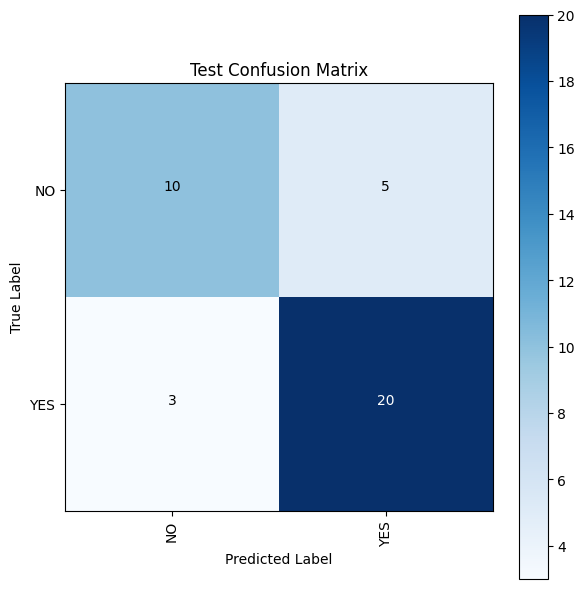

In [ ]:

# Plot model performance
acc = history.history.get('accuracy')
val_acc = history.history.get('val_accuracy')
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Set')
plt.plot(epochs_range, val_acc, label='Validation Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    class_names = [classes[i] for i in range(len(classes))]
    plt.xticks(tick_marks, class_names, rotation=90)
    plt.yticks(tick_marks, class_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    cm = np.round(cm, 2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, int(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Evaluate on validation set
val_steps = validation_generator.samples // validation_generator.batch_size + 1
val_predictions = model.predict(validation_generator, steps=val_steps)
val_predictions = (val_predictions > 0.5).astype(int).flatten()
y_val_true = validation_generator.classes

val_accuracy = accuracy_score(y_val_true, val_predictions)
print('Validation Accuracy = {:.2f}%'.format(val_accuracy * 100))

confusion_mtx = confusion_matrix(y_val_true, val_predictions)
plot_confusion_matrix(confusion_mtx, classes=labels, title='Validation Confusion Matrix')

# Evaluate on test set
test_steps = test_generator.samples // test_generator.batch_size + 1
test_predictions = model.predict(test_generator, steps=test_steps)
test_predictions = (test_predictions > 0.5).astype(int).flatten()
y_test_true = test_generator.classes

test_accuracy = accuracy_score(y_test_true, test_predictions)
print('Test Accuracy = {:.2f}%'.format(test_accuracy * 100))

confusion_mtx = confusion_matrix(y_test_true, test_predictions)
plot_confusion_matrix(confusion_mtx, classes=labels, title='Test Confusion Matrix')




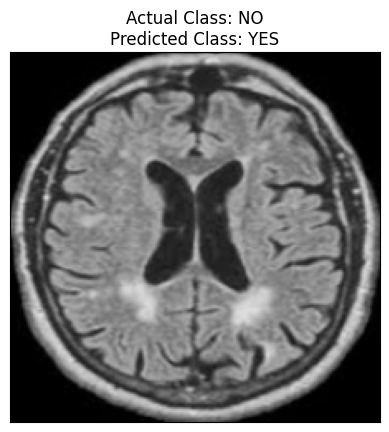

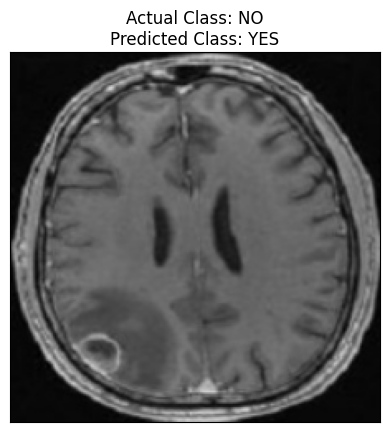

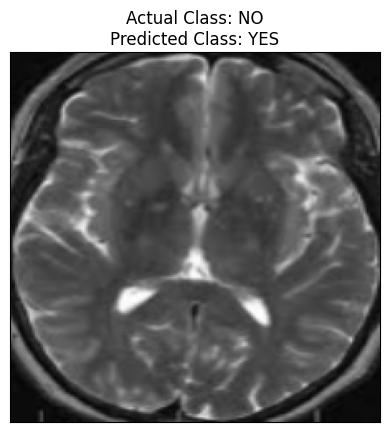

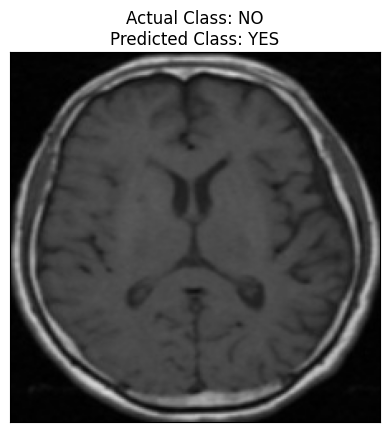

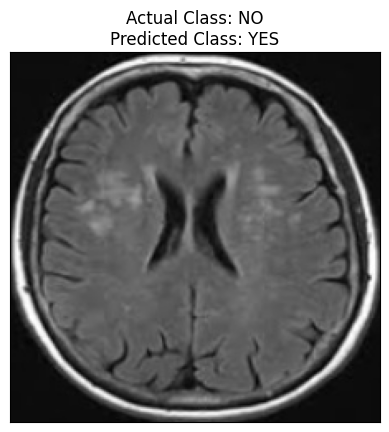

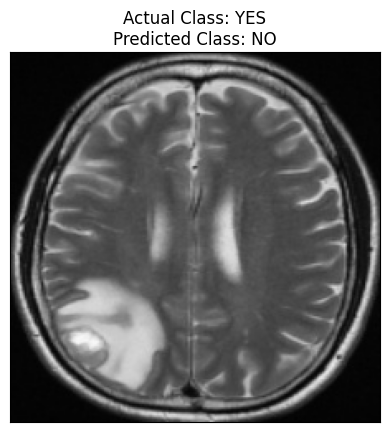

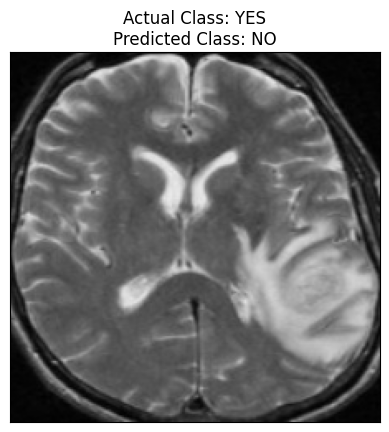

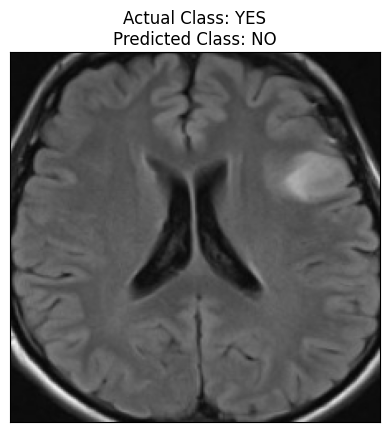

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [ ]:
# Display misclassified images
misclassified_indices = np.where(y_test_true != test_predictions)[0]
if misclassified_indices.size == 0:
    print('There are no misclassified images.')
else:
    for i in misclassified_indices:
        img_path = test_generator.filepaths[i]
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure()
        plt.imshow(img_rgb)
        plt.xticks([])
        plt.yticks([])
        actual_class = 'YES' if y_test_true[i] == 1 else 'NO'
        predicted_class = 'YES' if test_predictions[i] == 1 else 'NO'
        plt.title(f'Actual Class: {actual_class}\nPredicted Class: {predicted_class}')
        plt.show()

# Save the trained model
model.save('brain_tumor_vgg16_model.h5')

1/1 [==============================] - 0s 195ms/step


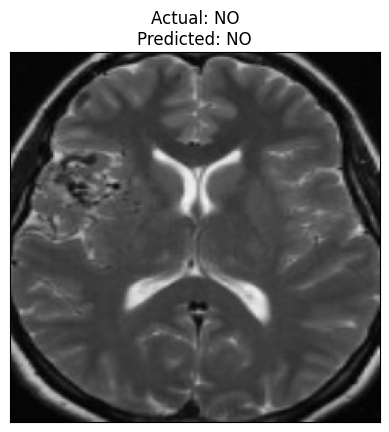

1/1 [==============================] - 0s 74ms/step


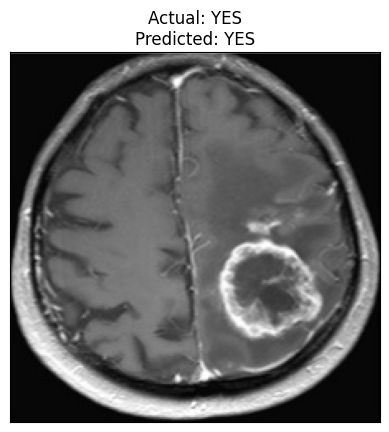

1/1 [==============================] - 0s 83ms/step


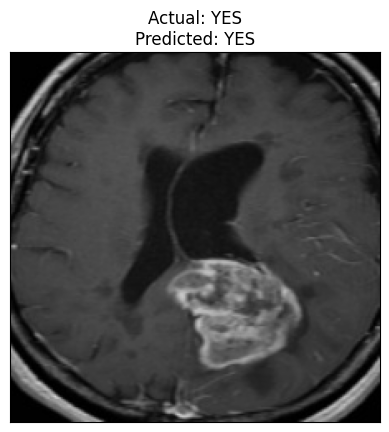

1/1 [==============================] - 0s 77ms/step


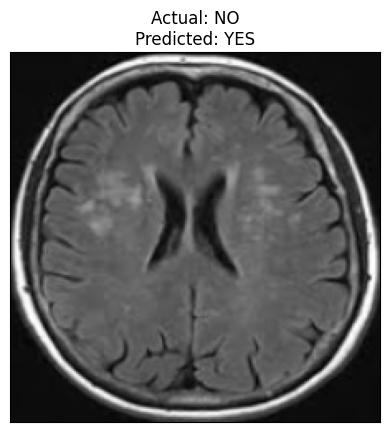

1/1 [==============================] - 0s 75ms/step


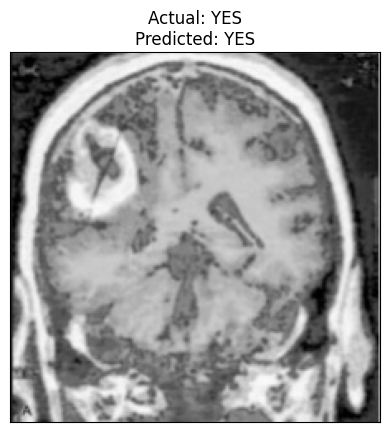

In [ ]:
# Take sample data from test set and show the result
import random

# Number of samples to display
num_samples = 5

# Get the filepaths and labels from test_generator
test_filepaths = test_generator.filepaths
test_labels = test_generator.classes

# Randomly select sample indices
sample_indices = random.sample(range(len(test_filepaths)), num_samples)

for idx in sample_indices:
    img_path = test_filepaths[idx]
    actual_label = 'YES' if test_labels[idx] == 1 else 'NO'

    img = cv2.imread(img_path)
    if img is None:
        print(f"Error: Could not load image at {img_path}")
        continue  # Skip to the next image

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, IMG_SIZE)

    # Preprocess the image
    img_array = np.expand_dims(img_resized, axis=0)
    img_preprocessed = preprocess_input(img_array)

    # Make prediction
    prediction = model.predict(img_preprocessed)
    predicted_label = 'YES' if prediction > 0.5 else 'NO'

    # Display the image with labels
    plt.figure()
    plt.imshow(img_rgb)
    plt.xticks([])
    plt.yticks([])
    plt.title(f'Actual: {actual_label}\nPredicted: {predicted_label}')
    plt.show()